In [1]:
!pip install catboost
import numpy as np    #for mathematical operations
from catboost import Pool, CatBoostRegressor   #internal data format
import pandas as pd   #for data analysis and machine learning task
import numpy as np
import seaborn as sns    #for interactive graphs  
from sklearn.model_selection import train_test_split  #for splitting data into train and test
from sklearn.metrics import mean_squared_error  

You should consider upgrading via the 'C:\Users\raahi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
path = "hyddataset_smoted.csv" 
air = pd.read_csv(path) #read dataset csv file
air


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Hyderabad,08/09/2015,91.820000,32.940000,5.410000,28.930000,23.370000,24.940000,0.480000,7.980000,27.040000,1.010000,5.740000,179.000000,Moderate
1,Hyderabad,09/09/2015,35.560000,40.810000,4.020000,31.150000,24.310000,24.810000,0.570000,4.930000,22.480000,1.410000,7.610000,162.000000,Moderate
2,Hyderabad,10/09/2015,45.640000,44.890000,7.060000,28.960000,25.580000,24.800000,0.730000,5.290000,24.690000,1.250000,7.840000,76.000000,Satisfactory
3,Hyderabad,11/09/2015,60.880000,51.270000,5.150000,30.640000,24.220000,25.860000,0.530000,5.160000,24.110000,1.090000,5.420000,140.000000,Moderate
4,Hyderabad,12/09/2015,65.610000,41.310000,3.400000,26.030000,20.370000,24.780000,0.570000,5.440000,25.470000,0.830000,4.390000,128.000000,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,Hyderabad,30/10/2015,340.677044,96.290151,7.595364,15.827054,7.212114,10.472303,1.088785,9.287472,38.973295,1.251554,6.332291,509.649077,Severe
5207,Hyderabad,30/10/2015,466.482131,94.237127,4.314219,8.668401,24.608807,10.783249,1.162387,7.586858,37.858747,1.465365,12.107427,495.778620,Severe
5208,Hyderabad,30/10/2015,508.011868,90.743098,5.117384,12.733718,24.468639,10.740447,1.224567,7.765747,37.735443,1.530954,12.462584,473.312645,Severe
5209,Hyderabad,30/10/2015,362.086028,96.490979,11.974872,14.043871,19.563076,10.587956,1.250717,9.238711,38.720658,1.320003,7.450367,456.592219,Severe


In [3]:
X=air[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene"]]
y=air["AQI"]

In [4]:
y.shape #dimension of y axis

(5211,)

splitting dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42) 
#random_state-> selection of random combination of test and train
#test_size-> size of the test data sample

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler() #standardize y values
X_train = sc_x.fit_transform(X_train)     #use fit_transform for train and transform for test
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))  #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1)) #rows=unknown, column=1

In [7]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features=None) #Catboost uses pooling for faster execution
test_pool = Pool(X_test,
                 y_test,
                 cat_features=None) 

In [8]:
model = CatBoostRegressor(iterations=1500, #setting number of iterations
                          depth=10, #regression depth is set -  the regression depth of a hyperplane  is the smallest number of residuals that need to change sign to make  a nonfit
                          learning_rate = 0.01, #the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
                          loss_function='RMSE', #loss function is the function that computes the distance between the current output of the algorithm and the expected output.
                          eval_metric = 'RMSE', #evaluation metric
                          random_seed = 55, #random seed value while creating training and test data set
                          od_type = "Iter", #overfitting detector - to stop after given number of iterations
                          metric_period = 1, #metrics to be calculated after every 1 iteration
                          od_wait = 20) #The number of iterations to continue the training after the iteration with the optimal metric value

In [9]:
model.fit(train_pool)

0:	learn: 0.9908708	total: 169ms	remaining: 4m 13s
1:	learn: 0.9815871	total: 203ms	remaining: 2m 31s
2:	learn: 0.9723871	total: 237ms	remaining: 1m 58s
3:	learn: 0.9635858	total: 270ms	remaining: 1m 41s
4:	learn: 0.9544886	total: 304ms	remaining: 1m 30s
5:	learn: 0.9458261	total: 338ms	remaining: 1m 24s
6:	learn: 0.9370392	total: 372ms	remaining: 1m 19s
7:	learn: 0.9282568	total: 413ms	remaining: 1m 16s
8:	learn: 0.9196291	total: 448ms	remaining: 1m 14s
9:	learn: 0.9110658	total: 483ms	remaining: 1m 11s
10:	learn: 0.9027563	total: 519ms	remaining: 1m 10s
11:	learn: 0.8944527	total: 553ms	remaining: 1m 8s
12:	learn: 0.8862539	total: 589ms	remaining: 1m 7s
13:	learn: 0.8780572	total: 627ms	remaining: 1m 6s
14:	learn: 0.8699348	total: 666ms	remaining: 1m 5s
15:	learn: 0.8620225	total: 701ms	remaining: 1m 4s
16:	learn: 0.8540317	total: 734ms	remaining: 1m 4s
17:	learn: 0.8460465	total: 767ms	remaining: 1m 3s
18:	learn: 0.8382039	total: 802ms	remaining: 1m 2s
19:	learn: 0.8303181	total: 84

164:	learn: 0.2264507	total: 6.07s	remaining: 49.1s
165:	learn: 0.2246083	total: 6.11s	remaining: 49.1s
166:	learn: 0.2227705	total: 6.14s	remaining: 49s
167:	learn: 0.2209271	total: 6.17s	remaining: 49s
168:	learn: 0.2191313	total: 6.21s	remaining: 48.9s
169:	learn: 0.2173426	total: 6.24s	remaining: 48.8s
170:	learn: 0.2155189	total: 6.27s	remaining: 48.8s
171:	learn: 0.2138398	total: 6.27s	remaining: 48.4s
172:	learn: 0.2121126	total: 6.31s	remaining: 48.4s
173:	learn: 0.2103967	total: 6.34s	remaining: 48.3s
174:	learn: 0.2087234	total: 6.38s	remaining: 48.3s
175:	learn: 0.2070047	total: 6.41s	remaining: 48.2s
176:	learn: 0.2053410	total: 6.44s	remaining: 48.2s
177:	learn: 0.2036629	total: 6.48s	remaining: 48.1s
178:	learn: 0.2020142	total: 6.52s	remaining: 48.1s
179:	learn: 0.2003721	total: 6.55s	remaining: 48s
180:	learn: 0.1987853	total: 6.58s	remaining: 48s
181:	learn: 0.1972091	total: 6.62s	remaining: 48s
182:	learn: 0.1956594	total: 6.66s	remaining: 47.9s
183:	learn: 0.1941417	

329:	learn: 0.0808523	total: 11.7s	remaining: 41.6s
330:	learn: 0.0805133	total: 11.8s	remaining: 41.5s
331:	learn: 0.0801939	total: 11.8s	remaining: 41.5s
332:	learn: 0.0798794	total: 11.8s	remaining: 41.5s
333:	learn: 0.0796005	total: 11.9s	remaining: 41.4s
334:	learn: 0.0793062	total: 11.9s	remaining: 41.4s
335:	learn: 0.0790283	total: 11.9s	remaining: 41.3s
336:	learn: 0.0787518	total: 12s	remaining: 41.3s
337:	learn: 0.0784657	total: 12s	remaining: 41.3s
338:	learn: 0.0781880	total: 12s	remaining: 41.2s
339:	learn: 0.0779022	total: 12.1s	remaining: 41.2s
340:	learn: 0.0776230	total: 12.1s	remaining: 41.1s
341:	learn: 0.0773466	total: 12.1s	remaining: 41.1s
342:	learn: 0.0770634	total: 12.2s	remaining: 41.1s
343:	learn: 0.0768041	total: 12.2s	remaining: 41s
344:	learn: 0.0765279	total: 12.2s	remaining: 41s
345:	learn: 0.0762704	total: 12.3s	remaining: 40.9s
346:	learn: 0.0760099	total: 12.3s	remaining: 40.9s
347:	learn: 0.0757463	total: 12.3s	remaining: 40.8s
348:	learn: 0.0754984	

488:	learn: 0.0561293	total: 17.2s	remaining: 35.6s
489:	learn: 0.0560513	total: 17.3s	remaining: 35.6s
490:	learn: 0.0559825	total: 17.3s	remaining: 35.5s
491:	learn: 0.0559196	total: 17.3s	remaining: 35.5s
492:	learn: 0.0558447	total: 17.4s	remaining: 35.5s
493:	learn: 0.0557696	total: 17.4s	remaining: 35.4s
494:	learn: 0.0557001	total: 17.4s	remaining: 35.4s
495:	learn: 0.0556335	total: 17.5s	remaining: 35.4s
496:	learn: 0.0555489	total: 17.5s	remaining: 35.3s
497:	learn: 0.0554581	total: 17.5s	remaining: 35.3s
498:	learn: 0.0553703	total: 17.6s	remaining: 35.3s
499:	learn: 0.0553038	total: 17.6s	remaining: 35.2s
500:	learn: 0.0552201	total: 17.6s	remaining: 35.2s
501:	learn: 0.0551539	total: 17.7s	remaining: 35.1s
502:	learn: 0.0550719	total: 17.7s	remaining: 35.1s
503:	learn: 0.0549994	total: 17.7s	remaining: 35.1s
504:	learn: 0.0549280	total: 17.8s	remaining: 35s
505:	learn: 0.0548499	total: 17.8s	remaining: 35s
506:	learn: 0.0547619	total: 17.9s	remaining: 35s
507:	learn: 0.0546

653:	learn: 0.0477218	total: 22.9s	remaining: 29.6s
654:	learn: 0.0476793	total: 22.9s	remaining: 29.6s
655:	learn: 0.0476450	total: 23s	remaining: 29.5s
656:	learn: 0.0476054	total: 23s	remaining: 29.5s
657:	learn: 0.0475615	total: 23s	remaining: 29.5s
658:	learn: 0.0475306	total: 23.1s	remaining: 29.4s
659:	learn: 0.0474916	total: 23.1s	remaining: 29.4s
660:	learn: 0.0474558	total: 23.1s	remaining: 29.4s
661:	learn: 0.0474189	total: 23.2s	remaining: 29.3s
662:	learn: 0.0473805	total: 23.2s	remaining: 29.3s
663:	learn: 0.0473514	total: 23.2s	remaining: 29.3s
664:	learn: 0.0473144	total: 23.3s	remaining: 29.2s
665:	learn: 0.0472844	total: 23.3s	remaining: 29.2s
666:	learn: 0.0472402	total: 23.3s	remaining: 29.1s
667:	learn: 0.0472014	total: 23.4s	remaining: 29.1s
668:	learn: 0.0471624	total: 23.4s	remaining: 29.1s
669:	learn: 0.0471396	total: 23.4s	remaining: 29s
670:	learn: 0.0471043	total: 23.5s	remaining: 29s
671:	learn: 0.0470610	total: 23.5s	remaining: 29s
672:	learn: 0.0470336	to

812:	learn: 0.0426642	total: 28.4s	remaining: 24s
813:	learn: 0.0426351	total: 28.5s	remaining: 24s
814:	learn: 0.0426141	total: 28.5s	remaining: 24s
815:	learn: 0.0425961	total: 28.5s	remaining: 23.9s
816:	learn: 0.0425601	total: 28.6s	remaining: 23.9s
817:	learn: 0.0425317	total: 28.6s	remaining: 23.9s
818:	learn: 0.0425021	total: 28.7s	remaining: 23.8s
819:	learn: 0.0424695	total: 28.7s	remaining: 23.8s
820:	learn: 0.0424436	total: 28.7s	remaining: 23.8s
821:	learn: 0.0424162	total: 28.8s	remaining: 23.7s
822:	learn: 0.0423848	total: 28.8s	remaining: 23.7s
823:	learn: 0.0423551	total: 28.9s	remaining: 23.7s
824:	learn: 0.0423241	total: 28.9s	remaining: 23.6s
825:	learn: 0.0422957	total: 28.9s	remaining: 23.6s
826:	learn: 0.0422664	total: 29s	remaining: 23.6s
827:	learn: 0.0422422	total: 29s	remaining: 23.5s
828:	learn: 0.0422108	total: 29s	remaining: 23.5s
829:	learn: 0.0421832	total: 29.1s	remaining: 23.5s
830:	learn: 0.0421589	total: 29.1s	remaining: 23.4s
831:	learn: 0.0421366	to

974:	learn: 0.0385375	total: 34.1s	remaining: 18.3s
975:	learn: 0.0385214	total: 34.1s	remaining: 18.3s
976:	learn: 0.0385017	total: 34.1s	remaining: 18.3s
977:	learn: 0.0384701	total: 34.2s	remaining: 18.2s
978:	learn: 0.0384353	total: 34.2s	remaining: 18.2s
979:	learn: 0.0384085	total: 34.2s	remaining: 18.2s
980:	learn: 0.0383884	total: 34.3s	remaining: 18.1s
981:	learn: 0.0383679	total: 34.3s	remaining: 18.1s
982:	learn: 0.0383446	total: 34.3s	remaining: 18.1s
983:	learn: 0.0383269	total: 34.4s	remaining: 18s
984:	learn: 0.0382991	total: 34.4s	remaining: 18s
985:	learn: 0.0382730	total: 34.4s	remaining: 18s
986:	learn: 0.0382554	total: 34.5s	remaining: 17.9s
987:	learn: 0.0382315	total: 34.5s	remaining: 17.9s
988:	learn: 0.0381957	total: 34.6s	remaining: 17.9s
989:	learn: 0.0381686	total: 34.6s	remaining: 17.8s
990:	learn: 0.0381388	total: 34.6s	remaining: 17.8s
991:	learn: 0.0381114	total: 34.7s	remaining: 17.7s
992:	learn: 0.0380908	total: 34.7s	remaining: 17.7s
993:	learn: 0.0380

1134:	learn: 0.0349985	total: 39.7s	remaining: 12.8s
1135:	learn: 0.0349837	total: 39.8s	remaining: 12.7s
1136:	learn: 0.0349568	total: 39.8s	remaining: 12.7s
1137:	learn: 0.0349384	total: 39.8s	remaining: 12.7s
1138:	learn: 0.0349182	total: 39.9s	remaining: 12.6s
1139:	learn: 0.0348916	total: 39.9s	remaining: 12.6s
1140:	learn: 0.0348747	total: 39.9s	remaining: 12.6s
1141:	learn: 0.0348419	total: 40s	remaining: 12.5s
1142:	learn: 0.0348215	total: 40s	remaining: 12.5s
1143:	learn: 0.0348024	total: 40s	remaining: 12.5s
1144:	learn: 0.0347852	total: 40.1s	remaining: 12.4s
1145:	learn: 0.0347690	total: 40.1s	remaining: 12.4s
1146:	learn: 0.0347478	total: 40.1s	remaining: 12.4s
1147:	learn: 0.0347314	total: 40.2s	remaining: 12.3s
1148:	learn: 0.0347129	total: 40.2s	remaining: 12.3s
1149:	learn: 0.0346947	total: 40.2s	remaining: 12.2s
1150:	learn: 0.0346753	total: 40.3s	remaining: 12.2s
1151:	learn: 0.0346531	total: 40.3s	remaining: 12.2s
1152:	learn: 0.0346342	total: 40.3s	remaining: 12.1s

1293:	learn: 0.0320624	total: 45.2s	remaining: 7.2s
1294:	learn: 0.0320411	total: 45.2s	remaining: 7.16s
1295:	learn: 0.0320214	total: 45.3s	remaining: 7.13s
1296:	learn: 0.0320094	total: 45.3s	remaining: 7.09s
1297:	learn: 0.0319842	total: 45.4s	remaining: 7.06s
1298:	learn: 0.0319697	total: 45.4s	remaining: 7.02s
1299:	learn: 0.0319570	total: 45.4s	remaining: 6.99s
1300:	learn: 0.0319435	total: 45.5s	remaining: 6.95s
1301:	learn: 0.0319287	total: 45.5s	remaining: 6.92s
1302:	learn: 0.0319055	total: 45.5s	remaining: 6.88s
1303:	learn: 0.0318838	total: 45.6s	remaining: 6.85s
1304:	learn: 0.0318648	total: 45.6s	remaining: 6.81s
1305:	learn: 0.0318455	total: 45.6s	remaining: 6.78s
1306:	learn: 0.0318305	total: 45.7s	remaining: 6.74s
1307:	learn: 0.0318062	total: 45.7s	remaining: 6.71s
1308:	learn: 0.0317891	total: 45.7s	remaining: 6.67s
1309:	learn: 0.0317625	total: 45.8s	remaining: 6.64s
1310:	learn: 0.0317448	total: 45.8s	remaining: 6.6s
1311:	learn: 0.0317288	total: 45.8s	remaining: 6

1452:	learn: 0.0295974	total: 51.1s	remaining: 1.65s
1453:	learn: 0.0295817	total: 51.1s	remaining: 1.62s
1454:	learn: 0.0295621	total: 51.1s	remaining: 1.58s
1455:	learn: 0.0295460	total: 51.2s	remaining: 1.55s
1456:	learn: 0.0295291	total: 51.2s	remaining: 1.51s
1457:	learn: 0.0295217	total: 51.2s	remaining: 1.48s
1458:	learn: 0.0295071	total: 51.3s	remaining: 1.44s
1459:	learn: 0.0294917	total: 51.3s	remaining: 1.41s
1460:	learn: 0.0294717	total: 51.4s	remaining: 1.37s
1461:	learn: 0.0294568	total: 51.4s	remaining: 1.33s
1462:	learn: 0.0294424	total: 51.4s	remaining: 1.3s
1463:	learn: 0.0294292	total: 51.5s	remaining: 1.26s
1464:	learn: 0.0294117	total: 51.5s	remaining: 1.23s
1465:	learn: 0.0293976	total: 51.5s	remaining: 1.2s
1466:	learn: 0.0293892	total: 51.6s	remaining: 1.16s
1467:	learn: 0.0293812	total: 51.6s	remaining: 1.12s
1468:	learn: 0.0293690	total: 51.6s	remaining: 1.09s
1469:	learn: 0.0293609	total: 51.7s	remaining: 1.05s
1470:	learn: 0.0293397	total: 51.7s	remaining: 1

In [10]:
preds = model.predict(test_pool)

In [11]:
print(preds)

[ 1.56063408 -1.12823942 -1.11025623 ...  0.70086058 -0.83969644
 -1.09143487]


calculating metrics

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,preds)
mean_error = mean_squared_error(y_test,preds)
mae = mean_absolute_error(y_test,preds)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)

R2 SCORE is 0.995976188309401
mean_sqrd_error is  0.004095334615436736
Root mean squared error of is 0.06399480147196908
Mean Absolute error is 0.03247047439143774
Accuracy is 0.9675295256085623


In [13]:
#feature importance- giving score to each feature to determine their importance
prediction_diff = model.get_feature_importance(train_pool,
                                               prettified=True)  #the difference between the metric obtained using the model in normal scenario and model without this feature

In [14]:
prediction_diff

,Feature Id,Importances
0,0,59.675269
1,8,10.110562
2,1,8.823321
3,3,3.529926
4,6,3.373772
5,5,2.727174
6,4,2.689062
7,9,2.588256
8,2,2.476552
9,10,2.120188


plotting graphs

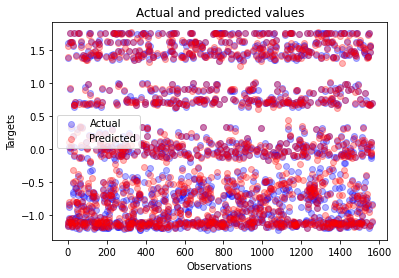

In [15]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3) #alpha is for transparency
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend() #A legend is an area describing the elements of the graph.
plt.show()

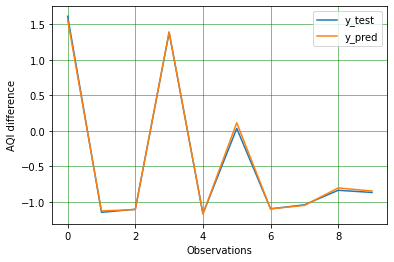

In [16]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(preds.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_pred'))
plt.show()


C:\Users\raahi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


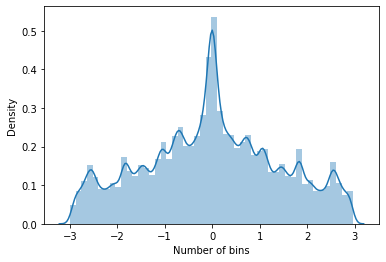

In [17]:
fig = sns.distplot(y_test-preds)
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig)

In [18]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten() #copying old array collapsed in 1D
result["PREDICTED AQI"] = preds
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)


,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,1.610955,1.560634,0.050321,Accurate,3.123700
1,-1.148438,-1.128239,-0.020199,Accurate,-1.758781
2,-1.104907,-1.110256,0.005349,Accurate,-0.484123
3,1.381118,1.392133,-0.011015,Accurate,0.797516
4,-1.167078,-1.170609,0.003531,Accurate,-0.302522
5,0.032138,0.112225,-0.080086,Accurate,249.191792
6,-1.098730,-1.099423,0.000694,Accurate,-0.063123
7,-1.042808,-1.050862,0.008054,Accurate,-0.772340
8,-0.837762,-0.805056,-0.032706,Accurate,-3.903921
9,-0.868829,-0.848529,-0.020301,Accurate,-2.336562
